# Simulate the CT scan

In [1]:
import os
# from gvxrPython3 import gvxr
from gvxrPython3 import json2gvxr

from gvxrPython3.JSON2gVXRDataReader import *

from cil.utilities.display import show_geometry
from cil.processors import TransmissionAbsorptionConverter
from cil.recon import FDK
from cil.utilities.jupyter import islicer

Wed Nov  8 16:32:25 2023 (WW) Spekpy is not installed, try Xpecgen instead.
Wed Nov  8 16:32:25 2023 (WW) Xpecgen is not installed either.


spekpy is not install, you won't be able to load a beam spectrum using spekpy
xpecgen is not install, you won't be able to load a beam spectrum using xpecgen
SimpleGVXR 2.0.7 (2023-11-06T13:48:17) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.7 (2023-11-06T13:48:16) [Compiler: GNU g++] on Linux


In [2]:
current_folder = str(globals()['_dh'][0])
data_path = "25OctoberData/"
JSON_fname = current_folder + "/" + data_path + "/simulation.json"

In [3]:
# Create an OpenGL context
# MS Windows
if os.name == "nt":
    json2gvxr.initGVXR(JSON_fname, "OPENGL")
# MacOS
elif str(os.uname()).find("Darwin") >= 0:
    json2gvxr.initGVXR(JSON_fname, "OPENGL")
else:
    json2gvxr.initGVXR(JSON_fname, "OPENGL")

Create an OpenGL context: 800x600


Wed Nov  8 16:32:26 2023 ---- Create window (ID: -1)
Wed Nov  8 16:32:26 2023 ---- Initialise GLFW
Wed Nov  8 16:32:26 2023 ---- Create an OpenGL window with a 3.2 context.
Wed Nov  8 16:32:26 2023 ---- Make the window's context current
Wed Nov  8 16:32:26 2023 ---- Initialise GLEW
Wed Nov  8 16:32:26 2023 ---- OpenGL vendor: NVIDIA Corporation
Wed Nov  8 16:32:26 2023 ---- OpenGL renderer: NVIDIA GeForce RTX 4060 Ti/PCIe/SSE2
Wed Nov  8 16:32:26 2023 ---- OpenGL version: 3.2.0 NVIDIA 535.104.05
Wed Nov  8 16:32:26 2023 ---- Use OpenGL 4.5.
Wed Nov  8 16:32:26 2023 ---- Initialise the X-ray renderer if needed and if possible


In [4]:
json2gvxr.initDetector(JSON_fname)
json2gvxr.initSourceGeometry()
json2gvxr.initSpectrum()
json2gvxr.initSamples()

Set up the detector
	Detector position: [-11.552525479593108, 14.407952284530735, -163.61129090613875, 'mm']
	Detector up vector: [0.0, -1.0, 0.0]
	Number of pixels: [640, 480]
	Detector number of pixels: [640, 480]
	Pixel spacing: [0.22999999523162842, 0.2300000031789144, 'mm']
Set up the beam
	Source position: [2.5676216409424324, 40.05596748962206, 67.59388700121015, 'mm']
	Source shape: PointSource


Wed Nov  8 16:32:26 2023 ---- Initialise the renderer
Wed Nov  8 16:32:26 2023 ---- file_name:	/home/fpvidal/PROGRAMMING/GitHub/MyProjects/25OctoberData/../Rabbit.stl	nb_faces:	75710	nb_vertices:	227130	bounding_box (in cm):	(-1.14473, -1.27, -1.20062)	(1.14473, 1.27, 1.20062)


In [5]:
json2gvxr.initScan()

Set up the CT Scan


In [6]:
reader = JSON2gVXRDataReader(file_name=JSON_fname)
data = reader.read(verbose=1)

Detecotr size: [147.1999969482422, 110.4000015258789, 'mm'] mm
Source position: [  2.56762164 -40.05596749  67.593887  ] mm
Detector position: [ -11.55252548  -14.40795228 -163.61129091] mm
Ray direction: [-0.06058808  0.11005296 -0.99207733]
Rotation axis: [0. 1. 0.]
Rotation axis position: [ -8.35867447 -18.90636475  22.33335908] mm
Angles: [  0.    3.6   7.2  10.8  14.4  18.   21.6  25.2  28.8  32.4  36.   39.6
  43.2  46.8  50.4  54.   57.6  61.2  64.8  68.4  72.   75.6  79.2  82.8
  86.4  90.   93.6  97.2 100.8 104.4 108.  111.6 115.2 118.8 122.4 126.
 129.6 133.2 136.8 140.4 144.  147.6 151.2 154.8 158.4 162.  165.6 169.2
 172.8 176.4 180.  183.6 187.2 190.8 194.4 198.  201.6 205.2 208.8 212.4
 216.  219.6 223.2 226.8 230.4 234.  237.6 241.2 244.8 248.4 252.  255.6
 259.2 262.8 266.4 270.  273.6 277.2 280.8 284.4 288.  291.6 295.2 298.8
 302.4 306.  309.6 313.2 316.8 320.4 324.  327.6 331.2 334.8 338.4 342.
 345.6 349.2 352.8 356.4 360. ] degrees
[640, 480]
[0.22999999523162842, 

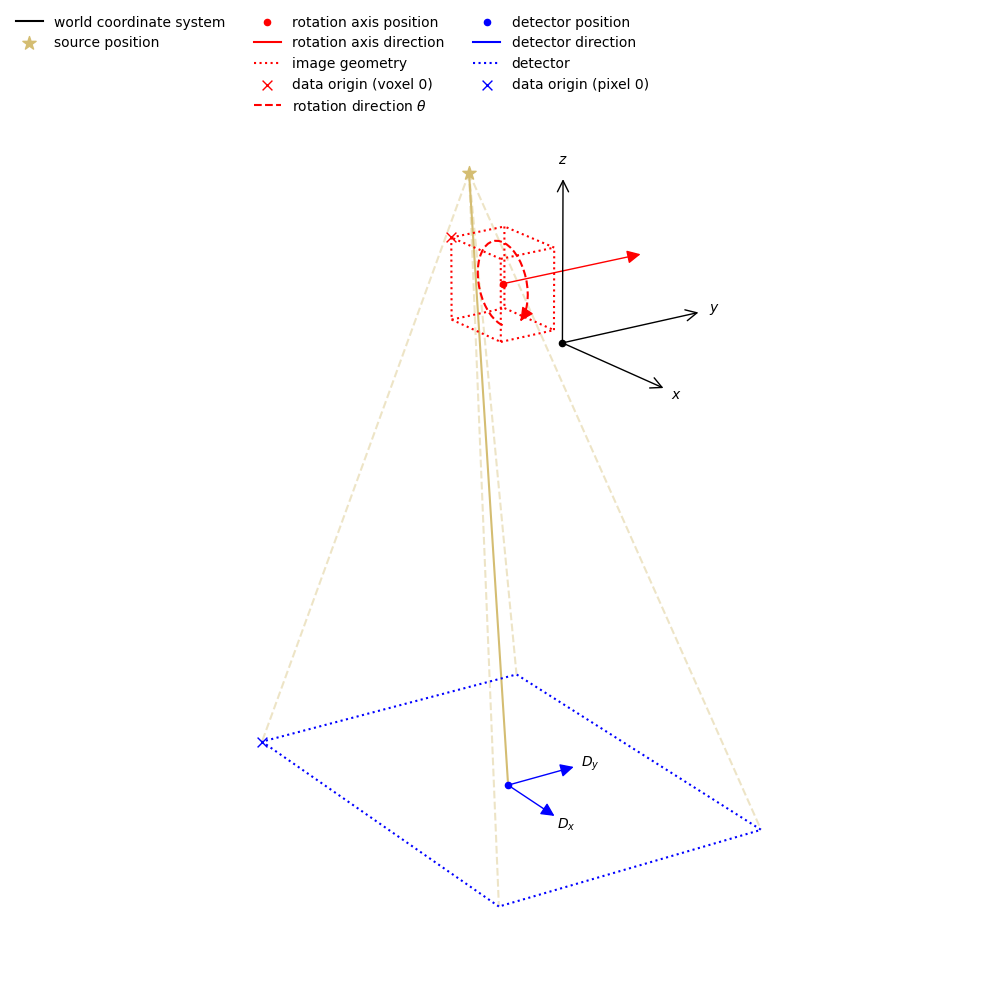

In [7]:
show_geometry(data.geometry)

In [8]:
data.reorder(order='tigre')
data_corr = TransmissionAbsorptionConverter(white_level=data.max())(data)

In [9]:
ig = data.geometry.get_ImageGeometry()

recons = FDK(data_corr, ig).run()

FDK recon

Input Data:
	angle: 101
	vertical: 480
	horizontal: 640

Reconstruction Volume:
	vertical: 480
	horizontal_y: 640
	horizontal_x: 640

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False



In [10]:
islicer(recons, direction='vertical')

In [11]:
islicer(recons, direction='horizontal_x')